                 Close
Date                  
2021-01-04  217.690002
2021-01-05  217.899994
2021-01-06  212.250000
2021-01-07  218.289993
2021-01-08  219.619995


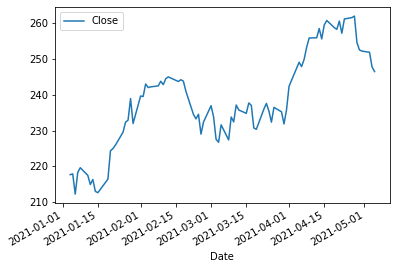

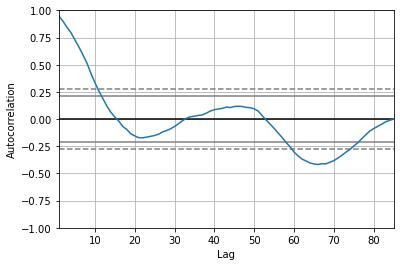

predicted=236.406707, expected=232.339996
predicted=234.308882, expected=236.479996
predicted=236.125870, expected=235.240005
predicted=234.547856, expected=231.850006
predicted=231.907243, expected=235.770004
predicted=236.490057, expected=242.350006
predicted=240.141335, expected=249.070007
predicted=247.451204, expected=247.860001
predicted=248.948916, expected=249.899994
predicted=251.346011, expected=253.250000
predicted=254.366483, expected=255.850006
predicted=254.939658, expected=255.910004
predicted=256.600246, expected=258.489990
predicted=259.331974, expected=255.589996
predicted=256.311696, expected=259.500000
predicted=259.202971, expected=260.739990
predicted=261.197267, expected=258.739990
predicted=258.144403, expected=258.260010
predicted=259.632994, expected=260.579987
predicted=260.520783, expected=257.170013
predicted=256.764935, expected=261.149994
predicted=260.838301, expected=261.549988
predicted=261.891133, expected=261.970001
predicted=261.084684, expected=254

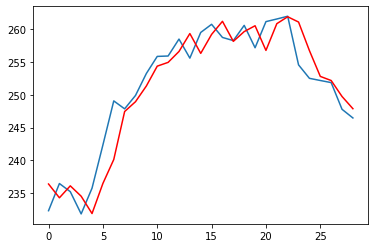

In [1]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
import pandas_datareader.data as wb
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def get_data_from_api(ticker, start_date, end_date):
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe

start = datetime(2021,1,1)
end = datetime(2021,5,5)
tickerList = 'MSFT'
df = get_data_from_api(tickerList, start, end)
df = df[['Close']]
# split into train and test sets

print(df.head())
df.plot()
pyplot.show()

autocorrelation_plot(df)
pyplot.show()

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()